In [22]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [23]:
# Importing dataset through Pandas
df = pd.read_csv("../datasets/Patches.csv")
df.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,0,510,6279,Other
1,2590,2,212,-6,390,6225,Other
2,2804,9,268,65,3180,6121,Other
3,2785,18,242,118,3090,6211,Other
4,2595,2,153,-1,391,6172,Other


In [24]:
# Shape of the dataset
print(df.shape)

(15120, 7)


In [25]:
# info of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Elevation                           15120 non-null  int64 
 1   Slope                               15120 non-null  int64 
 2   Horizontal_Distance_To_Hydrology    15120 non-null  int64 
 3   Vertical_Distance_To_Hydrology      15120 non-null  int64 
 4   Horizontal_Distance_To_Roadways     15120 non-null  int64 
 5   Horizontal_Distance_To_Fire_Points  15120 non-null  int64 
 6   Tree                                15120 non-null  object
dtypes: int64(6), object(1)
memory usage: 827.0+ KB
None


In [26]:
# Converting Categorical features into Numerical features
print(df['Tree'].unique())
df['Tree'] = df['Tree'].map({'Other':0, 'Spruce':1})


['Other' 'Spruce']


In [27]:
df.head(45)

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,0,510,6279,0
1,2590,2,212,-6,390,6225,0
2,2804,9,268,65,3180,6121,0
3,2785,18,242,118,3090,6211,0
4,2595,2,153,-1,391,6172,0
5,2579,6,300,-15,67,6031,0
6,2606,7,270,5,633,6256,0
7,2605,4,234,7,573,6228,0
8,2617,9,240,56,666,6244,0
9,2612,10,247,11,636,6230,0


In [28]:
# Description of dataset
df.describe()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,16.501587,227.195701,51.076521,1714.023214,1511.147288,0.142857
std,417.678187,8.453927,210.075296,61.239406,1325.066358,1099.936493,0.349939
min,1863.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,0.000000
25%,2376.000000,10.000000,67.000000,5.000000,764.000000,730.000000,0.000000
50%,2752.000000,15.000000,180.000000,32.000000,1316.000000,1256.000000,0.000000
75%,3104.000000,22.000000,330.000000,79.000000,2270.000000,1988.250000,0.000000
max,3849.000000,52.000000,1343.000000,554.000000,6890.000000,6993.000000,1.000000


In [29]:
# Plotting Correlation Heatmap
corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='Patches-corrheatmap.html')

'Patches-corrheatmap.html'

In [ ]:
# Dropping columns with high correlation + causation
# X = dataset.drop([], axis = 1)
# print(type(X))
# print(X.shape)

In [ ]:
# Defining if residual sugar was high or low
# def converter(column):
#     if column <= 5.2:
#         return 1 # Low
#     else:
#         return 0 # High

# dataset['residual sugar'] = dataset['residual sugar'].apply(converter)
# print(dataset.head())
# print(dataset.info())

In [30]:
# Dividing data into subsets
subset = df[['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Tree']]

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(subset)

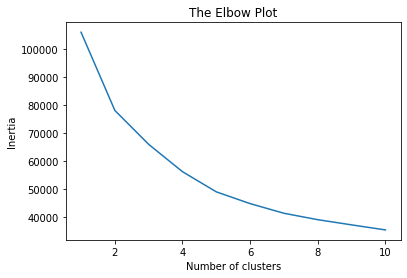

In [31]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =50,n_iter=2000)
x_tsne = tsne.fit_transform(X)

elevation = list(df['Elevation'])
slope = list(df['Slope'])
horizontal_Distance_To_Hydrology = list(df['Horizontal_Distance_To_Hydrology'])
vertical_Distance_To_Hydrology = list(df['Vertical_Distance_To_Hydrology'])
horizontal_Distance_To_Roadways = list(df['Horizontal_Distance_To_Roadways'])
horizontal_Distance_To_Fire_Points = list(df['Horizontal_Distance_To_Fire_Points'])
tree = list(df['Tree'])


data = [go.Scatter(x=x_tsne[:,0],
                   y=x_tsne[:,1], 
                   mode='markers',
                   marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                   text=[f'ele: {a}, slope: {b}, hor_Hydrology: {c}, ver_Hydrology: {d}, hor_Roadways: {e}, hor_Fire: {f}, tree: {g}' 
                         for a,b,c,d,e,f,g in list(zip(elevation,
                                                     slope,
                                                     horizontal_Distance_To_Hydrology,
                                                     vertical_Distance_To_Hydrology,
                                                     horizontal_Distance_To_Roadways,
                                                     horizontal_Distance_To_Fire_Points,
                                                     tree
                                                    ))],
                                hoverinfo='text')]
layout = go.Layout(title = 't-SNE Dimensionality Reduction For Patches', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='patches-t-SNE.html')

't-SNE.html'